In [2]:
# mlp for multi-label classification
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [3]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

import matplotlib as mpl
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import math
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TextVectorization
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import roc_curve, auc
import re
import string
import random

In [6]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [7]:
%run feature_extractor.py
from feature_extractor import fingerprint_features

#### Loading the datasets

In [8]:
dataset_single = pd.read_csv("D:\\Python\\ML_TEST_SERVIER\\dataset_single.csv")
dataset_multi = pd.read_csv("D:\\Python\\ML_TEST_SERVIER\\dataset_multi.csv")

#### Preparing the datasets

In [9]:
dataset_single.head()

,P1,mol_id,smiles
0,1,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,1,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,0,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,1,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O


In [10]:
dataset_multi.head()

,P2,P1,P3,P4,P5,P6,P7,P8,P9,mol_id,smiles
0,1,1,1,1,1,1,1,0,1,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0,0,1,1,0,0,0,1,1,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,1,1,0,1,1,1,1,1,1,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,1,0,0,1,1,0,1,1,1,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,0,1,1,1,0,1,0,0,1,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O


#### Check for null values

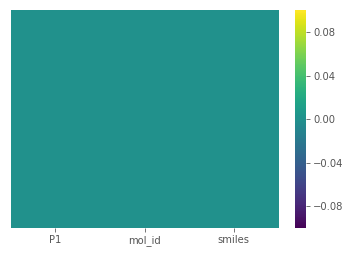

In [11]:
sb.heatmap(dataset_single.isnull(), yticklabels = False, cbar = True,cmap = 'viridis')

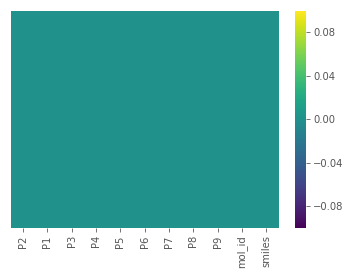

In [12]:
sb.heatmap(dataset_multi.isnull(), yticklabels = False, cbar = True,cmap = 'viridis')

#### Check for unique values

In [13]:
print(dataset_single.nunique())
print(dataset_multi.nunique())

P1           2
mol_id    4999
smiles    4999
dtype: int64
P2           2
P1           2
P3           2
P4           2
P5           2
P6           2
P7           2
P8           2
P9           2
mol_id    4999
smiles    4999
dtype: int64


#### The prediction column is imbalanced with a distribution of 0 to 1 roughly in the ratio of 1:4. We need to use stratified train_test split everytime we use the original dataset for training.

In [14]:
print(len(fingerprint_features(dataset_single['smiles'][0])))
print(len(fingerprint_features(dataset_multi['smiles'][5])))

2048
2048


In [16]:
# Program to convert the features to numpy array for training
c=[]
for i in range(0,len(dataset_single)):
    i= np.array(fingerprint_features(dataset_single['smiles'][i]))
    i=np.transpose(i)
    c.append(i)
new_array = np.array(c)  
new_array.shape

(4999, 2048)

In [17]:
X_init = new_array
y_single_init = dataset_single['P1']
y_multi_init = dataset_multi[['P1','P2','P3','P4','P5','P6','P7','P8','P9']]

In [18]:
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(X_init, y_single_init, test_size=0.20, random_state=1, stratify=y_single_init)
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_init, y_multi_init, test_size=0.20, random_state=1)

#### Using Imbalanced Learn

In [19]:
over = RandomOverSampler()
X_init_balanced, y_init_balanced = over.fit_resample(X_init, y_single_init) 

In [20]:
X_single_train_balanced, X_single_test_balanced, y_single_train_balanced, y_single_test_balanced = train_test_split(X_init_balanced, y_init_balanced, test_size=0.20, random_state=1)

#### Model 1

#### DNN Models

In [21]:
# baseline model, original dataset (unbalanced)
# We use a single hidden layer with 11 neurons (2048 = 2^11), binary crossentropy loss function and adam optimizer with default learning rate
# of 0.001
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(11, input_shape=(2048,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# evaluate model with kfold stratified cross validation
estimator = KerasClassifier(model=create_baseline(), epochs=20, batch_size=50, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
estimator.fit(X_single_train, y_single_train)
results = cross_val_score(estimator, X_single_train, y_single_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Test accuracy: %.2f%%" %(estimator.score(X_single_test, y_single_test)*100)) 

Epoch 1/20
80/80 [==============================] - 1s 2ms/step - loss: 0.4892 - accuracy: 0.8165
Epoch 2/20
80/80 [==============================] - 0s 4ms/step - loss: 0.4273 - accuracy: 0.8217
Epoch 3/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8217
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.8245
Epoch 5/20
80/80 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8345
Epoch 6/20
80/80 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8460
Epoch 7/20
80/80 [==============================] - 0s 4ms/step - loss: 0.3086 - accuracy: 0.8637
Epoch 8/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.8812
Epoch 9/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2580 - accuracy: 0.8940
Epoch 10/20
80/80 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.9112
Epoch 11/20
80/80 [

72/72 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9936
Epoch 18/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9958
Epoch 19/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9961
Epoch 20/20
8/8 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: C:\Users\abiswas\AppData\Local\Temp\tmpmf950ttk\assets
Epoch 1/20
72/72 [==============================] - 1s 3ms/step - loss: 0.0823 - accuracy: 0.9822
Epoch 2/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9842
Epoch 3/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0677 - accuracy: 0.9861
Epoch 4/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9867
Epoch 5/20
72/72 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9886
Epoch 6/20
72/72 [==============================] - 0s 2ms/step - loss: 

In [22]:
# baseline model, balanced dataset
# We use a single hidden layer with 11 neurons (2048 = 2^11), binary crossentropy loss function and adam optimizer with default learning rate
# of 0.001
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(11, input_shape=(2048,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# evaluate model with kfold cross validation
estimator = KerasClassifier(model=create_baseline(), epochs=20, batch_size=50, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
estimator.fit(X_single_train_balanced, y_single_train_balanced)
results = cross_val_score(estimator, X_single_train_balanced, y_single_train_balanced, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Test accuracy: %.2f%%" %(estimator.score(X_single_test, y_single_test)*100)) 

Epoch 1/20
132/132 [==============================] - 1s 2ms/step - loss: 0.6222 - accuracy: 0.6663
Epoch 2/20
132/132 [==============================] - 0s 3ms/step - loss: 0.5006 - accuracy: 0.7739
Epoch 3/20
132/132 [==============================] - 0s 4ms/step - loss: 0.4235 - accuracy: 0.8249
Epoch 4/20
132/132 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8588
Epoch 5/20
132/132 [==============================] - 0s 2ms/step - loss: 0.3145 - accuracy: 0.8932
Epoch 6/20
132/132 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9086
Epoch 7/20
132/132 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9227
Epoch 8/20
132/132 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.9367
Epoch 9/20
132/132 [==============================] - 0s 3ms/step - loss: 0.1879 - accuracy: 0.9451
Epoch 10/20
132/132 [==============================] - 0s 2ms/step - loss: 0.1681 - accuracy: 0.9527

119/119 [==============================] - 0s 4ms/step - loss: 0.0161 - accuracy: 0.9976
Epoch 14/20
119/119 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9983
Epoch 15/20
119/119 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9978
Epoch 16/20
119/119 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9981
Epoch 17/20
119/119 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9983
Epoch 18/20
119/119 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9985
Epoch 19/20
119/119 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9981
Epoch 20/20
14/14 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: C:\Users\abiswas\AppData\Local\Temp\tmpwiosjqpi\assets
Epoch 1/20
119/119 [==============================] - 1s 3ms/step - loss: 0.0475 - accuracy: 0.9926
Epoch 2/20
119/119 [==============================

#### The baseline model gives a good test accuracy when trained on the balanced dataset, we shall try to implement a deeper neural network to check if the accuracy improves or not.

In [23]:
# deeper neural network model
def create_deep():
    # create model
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model = Sequential()
    model.add(Dense(121, input_shape=(2048,), activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# evaluate model with smaller batch size, stratified kfold cross validation
estimator_deep = KerasClassifier(model=create_deep(), epochs=50, batch_size=40, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
estimator_deep.fit(X_single_train, y_single_train)
results = cross_val_score(estimator_deep, X_single_train, y_single_train, cv=kfold)
print("Slower learning rate, higher epoch: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Test accuracy: %.2f%%" %(estimator_deep.score(X_single_test, y_single_test)*100)) 

Epoch 1/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4615 - accuracy: 0.8205
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3594 - accuracy: 0.8307
Epoch 3/50
100/100 [==============================] - 1s 5ms/step - loss: 0.2375 - accuracy: 0.8977
Epoch 4/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1015 - accuracy: 0.9612
Epoch 5/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0523 - accuracy: 0.9830
Epoch 6/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0298 - accuracy: 0.9912
Epoch 7/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0124 - accuracy: 0.9972
Epoch 8/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0073 - accuracy: 0.9985
Epoch 9/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 10/50
100/100 [==============================] - 1s 5ms/step - loss: 0.0025 - accuracy: 0.9992

90/90 [==============================] - 1s 7ms/step - loss: 6.6520e-04 - accuracy: 0.9994
Epoch 7/50
90/90 [==============================] - 1s 8ms/step - loss: 0.1163 - accuracy: 0.9597
Epoch 8/50
90/90 [==============================] - 1s 7ms/step - loss: 0.1142 - accuracy: 0.9572
Epoch 9/50
90/90 [==============================] - 1s 7ms/step - loss: 0.0207 - accuracy: 0.9939
Epoch 10/50
90/90 [==============================] - 1s 7ms/step - loss: 0.0120 - accuracy: 0.9969
Epoch 11/50
90/90 [==============================] - 1s 6ms/step - loss: 0.0035 - accuracy: 0.9989
Epoch 12/50
90/90 [==============================] - 1s 6ms/step - loss: 6.6140e-04 - accuracy: 0.9997
Epoch 13/50
90/90 [==============================] - 1s 7ms/step - loss: 6.8501e-04 - accuracy: 0.9997
Epoch 14/50
90/90 [==============================] - 1s 7ms/step - loss: 5.6733e-04 - accuracy: 0.9997
Epoch 15/50
90/90 [==============================] - 1s 6ms/step - loss: 5.0468e-04 - accuracy: 0.9997
Epoch

90/90 [==============================] - 1s 6ms/step - loss: 1.2967e-06 - accuracy: 1.0000
Epoch 12/50
90/90 [==============================] - 1s 6ms/step - loss: 1.1619e-06 - accuracy: 1.0000
Epoch 13/50
90/90 [==============================] - 1s 6ms/step - loss: 1.0497e-06 - accuracy: 1.0000
Epoch 14/50
90/90 [==============================] - 1s 7ms/step - loss: 9.5254e-07 - accuracy: 1.0000
Epoch 15/50
90/90 [==============================] - 1s 6ms/step - loss: 8.6487e-07 - accuracy: 1.0000
Epoch 16/50
90/90 [==============================] - 1s 7ms/step - loss: 7.8985e-07 - accuracy: 1.0000
Epoch 17/50
90/90 [==============================] - 1s 6ms/step - loss: 7.2198e-07 - accuracy: 1.0000
Epoch 18/50
90/90 [==============================] - 1s 6ms/step - loss: 6.6262e-07 - accuracy: 1.0000
Epoch 19/50
90/90 [==============================] - 1s 7ms/step - loss: 6.0738e-07 - accuracy: 1.0000
Epoch 20/50
90/90 [==============================] - 1s 6ms/step - loss: 5.6009e-07 -

90/90 [==============================] - 0s 5ms/step - loss: 5.1478e-04 - accuracy: 0.9994
Epoch 17/50
90/90 [==============================] - 0s 5ms/step - loss: 4.3730e-04 - accuracy: 0.9997
Epoch 18/50
90/90 [==============================] - 0s 5ms/step - loss: 4.6662e-04 - accuracy: 0.9997
Epoch 19/50
90/90 [==============================] - 1s 7ms/step - loss: 4.7452e-04 - accuracy: 0.9994
Epoch 20/50
90/90 [==============================] - 0s 5ms/step - loss: 4.5337e-04 - accuracy: 0.9994
Epoch 21/50
90/90 [==============================] - 0s 5ms/step - loss: 4.3220e-04 - accuracy: 0.9994
Epoch 22/50
90/90 [==============================] - 0s 5ms/step - loss: 4.3757e-04 - accuracy: 0.9997
Epoch 23/50
90/90 [==============================] - 0s 5ms/step - loss: 4.3314e-04 - accuracy: 0.9997
Epoch 24/50
90/90 [==============================] - 0s 5ms/step - loss: 4.2095e-04 - accuracy: 0.9994
Epoch 25/50
90/90 [==============================] - 0s 5ms/step - loss: 4.2157e-04 -

In [24]:
# deeper neural network model, balanced dataset
def create_deep():
    # create model
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model = Sequential()
    model.add(Dense(121, input_shape=(2048,), activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# evaluate model with smaller batch size, stratified kfold cross validation
estimator_deep = KerasClassifier(model=create_deep(), epochs=50, batch_size=40, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
estimator_deep.fit(X_single_train_balanced, y_single_train_balanced)
results = cross_val_score(estimator_deep, X_single_train_balanced, y_single_train_balanced, cv=kfold)
print("Slower learning rate, higher epoch: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Test accuracy: %.2f%%" %(estimator_deep.score(X_single_test, y_single_test)*100)) 

Epoch 1/50
165/165 [==============================] - 1s 5ms/step - loss: 0.5252 - accuracy: 0.7327
Epoch 2/50
165/165 [==============================] - 1s 4ms/step - loss: 0.1923 - accuracy: 0.9285
Epoch 3/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0602 - accuracy: 0.9807
Epoch 4/50
165/165 [==============================] - 1s 4ms/step - loss: 0.0350 - accuracy: 0.9889
Epoch 5/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 6/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0151 - accuracy: 0.9956
Epoch 7/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0103 - accuracy: 0.9973
Epoch 8/50
165/165 [==============================] - 1s 5ms/step - loss: 0.0172 - accuracy: 0.9957
Epoch 9/50
165/165 [==============================] - 1s 6ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 10/50
165/165 [==============================] - 1s 6ms/step - loss: 0.0170 - accuracy: 0.9948

148/148 [==============================] - 1s 7ms/step - loss: 2.8194e-04 - accuracy: 0.9998
Epoch 5/50
148/148 [==============================] - 1s 5ms/step - loss: 2.7078e-04 - accuracy: 0.9998
Epoch 6/50
148/148 [==============================] - 1s 5ms/step - loss: 2.5820e-04 - accuracy: 0.9998
Epoch 7/50
148/148 [==============================] - 1s 6ms/step - loss: 2.5508e-04 - accuracy: 0.9998
Epoch 8/50
148/148 [==============================] - 1s 5ms/step - loss: 2.4793e-04 - accuracy: 0.9998
Epoch 9/50
148/148 [==============================] - 1s 5ms/step - loss: 2.4758e-04 - accuracy: 0.9998
Epoch 10/50
148/148 [==============================] - 1s 6ms/step - loss: 2.5117e-04 - accuracy: 0.9998
Epoch 11/50
148/148 [==============================] - 1s 6ms/step - loss: 2.5278e-04 - accuracy: 0.9997
Epoch 12/50
148/148 [==============================] - 1s 6ms/step - loss: 2.4044e-04 - accuracy: 0.9998
Epoch 13/50
148/148 [==============================] - 1s 6ms/step - los

148/148 [==============================] - 1s 7ms/step - loss: 3.4722e-04 - accuracy: 0.9998
Epoch 32/50
148/148 [==============================] - 1s 6ms/step - loss: 3.4893e-04 - accuracy: 0.9998
Epoch 33/50
148/148 [==============================] - 1s 6ms/step - loss: 3.5308e-04 - accuracy: 0.9998
Epoch 34/50
148/148 [==============================] - 1s 5ms/step - loss: 3.6832e-04 - accuracy: 0.9998
Epoch 35/50
148/148 [==============================] - 1s 4ms/step - loss: 3.5028e-04 - accuracy: 0.9998
Epoch 36/50
148/148 [==============================] - 1s 5ms/step - loss: 3.5703e-04 - accuracy: 0.9998
Epoch 37/50
148/148 [==============================] - 1s 5ms/step - loss: 3.5501e-04 - accuracy: 0.9998
Epoch 38/50
148/148 [==============================] - 1s 5ms/step - loss: 3.4601e-04 - accuracy: 0.9998
Epoch 39/50
148/148 [==============================] - 1s 5ms/step - loss: 3.6332e-04 - accuracy: 0.9998
Epoch 40/50
148/148 [==============================] - 1s 6ms/step 

148/148 [==============================] - 1s 4ms/step - loss: 1.0022e-07 - accuracy: 1.0000
Epoch 34/50
148/148 [==============================] - 1s 4ms/step - loss: 8.9331e-08 - accuracy: 1.0000
Epoch 35/50
148/148 [==============================] - 1s 4ms/step - loss: 7.9917e-08 - accuracy: 1.0000
Epoch 36/50
148/148 [==============================] - 1s 4ms/step - loss: 7.1711e-08 - accuracy: 1.0000
Epoch 37/50
148/148 [==============================] - 1s 4ms/step - loss: 6.4552e-08 - accuracy: 1.0000
Epoch 38/50
148/148 [==============================] - 1s 4ms/step - loss: 5.8187e-08 - accuracy: 1.0000
Epoch 39/50
148/148 [==============================] - 1s 7ms/step - loss: 5.2585e-08 - accuracy: 1.0000
Epoch 40/50
148/148 [==============================] - 1s 6ms/step - loss: 4.7645e-08 - accuracy: 1.0000
Epoch 41/50
148/148 [==============================] - 1s 4ms/step - loss: 4.3223e-08 - accuracy: 1.0000
Epoch 42/50
148/148 [==============================] - 1s 5ms/step 

148/148 [==============================] - 1s 7ms/step - loss: 3.3569e-04 - accuracy: 0.9998
Epoch 35/50
148/148 [==============================] - 1s 6ms/step - loss: 3.4272e-04 - accuracy: 0.9998
Epoch 36/50
148/148 [==============================] - 1s 7ms/step - loss: 3.5415e-04 - accuracy: 0.9998
Epoch 37/50
148/148 [==============================] - 1s 7ms/step - loss: 3.5282e-04 - accuracy: 0.9998
Epoch 38/50
148/148 [==============================] - 1s 7ms/step - loss: 3.4335e-04 - accuracy: 0.9998
Epoch 39/50
148/148 [==============================] - 1s 6ms/step - loss: 0.0150 - accuracy: 0.9959
Epoch 40/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0276 - accuracy: 0.9914
Epoch 41/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0108 - accuracy: 0.9981
Epoch 42/50
148/148 [==============================] - 1s 6ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 43/50
148/148 [==============================] - 1s 5ms/step - loss: 5.9605e-

#### The deeper model gives a better test accuracy when trained on the balanced dataset. We shall use this model for Model 1.

In [25]:
Model_1 = estimator_deep

In [46]:
tf.keras.models.save_model(Model_1.model, "D:\\Python\\ML_TEST_SERVIER\\ModelServ_1.csv")

INFO:tensorflow:Assets written to: D:\Python\ML_TEST_SERVIER\ModelServ_1.csv\assets


#### Model 2

In [27]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=2048, input_type = 'string')
D = dataset_single['smiles']
f = h.transform(D)
f.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X_init_model2 = f.toarray()

In [34]:
# Unbalanced Train, Test split obtained from smiles
X_single_train_model2, X_single_test_model2, y_single_train_model2, y_single_test_model2 = train_test_split(X_init_model2, y_single_init, test_size=0.20, random_state=1, stratify=y_single_init)

In [35]:
# Balanced Train, Test split obtained from smiles
X_single_train_model2_balanced, y_single_train_model2_balanced = over.fit_resample(X_single_train_model2, y_single_train_model2) 

In [36]:
# baseline model 2
# We use a single hidden layer with 11 neurons, binary crossentropy loss function and adam optimizer with default learning rate
# of 0.001
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(11, input_shape=(2048,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# evaluate model with Stratified KFold cross validation
estimator_model2 = KerasClassifier(model=create_baseline(), epochs=20, batch_size=50, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
estimator_model2.fit(X_single_train_model2, y_single_train_model2)
results = cross_val_score(estimator_model2, X_single_train_model2, y_single_train_model2, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Test accuracy: %.2f%%" %(estimator_model2.score(X_single_test_model2, y_single_test_model2)*100)) 

Epoch 1/20
80/80 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.8025
Epoch 2/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8215
Epoch 3/20
80/80 [==============================] - 0s 4ms/step - loss: 0.4340 - accuracy: 0.8217
Epoch 4/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4278 - accuracy: 0.8207
Epoch 5/20
80/80 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8172
Epoch 6/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.8192
Epoch 7/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8185
Epoch 8/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4174 - accuracy: 0.8187
Epoch 9/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8182
Epoch 10/20
80/80 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8207
Epoch 11/20
80/80 [

72/72 [==============================] - 0s 4ms/step - loss: 0.4041 - accuracy: 0.8230
Epoch 18/20
72/72 [==============================] - 0s 3ms/step - loss: 0.4029 - accuracy: 0.8213
Epoch 19/20
72/72 [==============================] - 0s 3ms/step - loss: 0.4038 - accuracy: 0.8213
Epoch 20/20
8/8 [==============================] - 0s 3ms/step
INFO:tensorflow:Assets written to: C:\Users\abiswas\AppData\Local\Temp\tmp3vp5cgmr\assets
Epoch 1/20
72/72 [==============================] - 1s 3ms/step - loss: 0.4068 - accuracy: 0.8199
Epoch 2/20
72/72 [==============================] - 0s 3ms/step - loss: 0.4069 - accuracy: 0.8208
Epoch 3/20
72/72 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8208
Epoch 4/20
72/72 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8172
Epoch 5/20
72/72 [==============================] - 0s 2ms/step - loss: 0.4056 - accuracy: 0.8202
Epoch 6/20
72/72 [==============================] - 0s 2ms/step - loss: 

In [37]:
# baseline model 2, balanced dataset
# We use a single hidden layer with 11 neurons, binary crossentropy loss function and adam optimizer with default learning rate
# of 0.001
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(11, input_shape=(2048,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# evaluate model with KFold CV, balanced dataset
estimator_model2_balanced = KerasClassifier(model=create_baseline(), epochs=20, batch_size=50, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
estimator_model2_balanced.fit(X_single_train_model2_balanced, y_single_train_model2_balanced)
results = cross_val_score(estimator_model2_balanced, X_single_train_model2_balanced, y_single_train_model2_balanced, cv=kfold)
print("Baseline Balanced Dataset: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Test accuracy: %.2f%%" %(estimator_model2_balanced.score(X_single_test_model2, y_single_test_model2)*100)) 

Epoch 1/20
132/132 [==============================] - 1s 2ms/step - loss: 0.6739 - accuracy: 0.5892
Epoch 2/20
132/132 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.6616
Epoch 3/20
132/132 [==============================] - 0s 3ms/step - loss: 0.6090 - accuracy: 0.6754
Epoch 4/20
132/132 [==============================] - 0s 3ms/step - loss: 0.5999 - accuracy: 0.6834
Epoch 5/20
132/132 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.6861
Epoch 6/20
132/132 [==============================] - 0s 3ms/step - loss: 0.5938 - accuracy: 0.6841
Epoch 7/20
132/132 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.6843
Epoch 8/20
132/132 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.6926
Epoch 9/20
132/132 [==============================] - 0s 2ms/step - loss: 0.5885 - accuracy: 0.6926
Epoch 10/20
132/132 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.6884

119/119 [==============================] - 0s 2ms/step - loss: 0.5725 - accuracy: 0.6964
Epoch 14/20
119/119 [==============================] - 0s 3ms/step - loss: 0.5734 - accuracy: 0.6967
Epoch 15/20
119/119 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.6969
Epoch 16/20
119/119 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.6950
Epoch 17/20
119/119 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.6977
Epoch 18/20
119/119 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.6977
Epoch 19/20
119/119 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.6962
Epoch 20/20
14/14 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: C:\Users\abiswas\AppData\Local\Temp\tmplxuzsvuf\assets
Epoch 1/20
119/119 [==============================] - 1s 4ms/step - loss: 0.5792 - accuracy: 0.6945
Epoch 2/20
119/119 [==============================

#### The baseline model 2 doesn't give a good test accuracy when trained on the balanced dataset, we shall try to implement a deeper neural network to check if the accuracy improves or not.

In [38]:
# deeper model 2
def create_deep():
    # create model
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model = Sequential()
    model.add(Dense(121, input_shape=(2048,), activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# evaluate model with Stratified KFold cross validation
estimator_model2_deep = KerasClassifier(model=create_deep(), epochs=20, batch_size=50, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
estimator_model2_deep.fit(X_single_train_model2, y_single_train_model2)
results = cross_val_score(estimator_model2_deep, X_single_train_model2, y_single_train_model2, cv=kfold)
print("Deeper Neural Network (unbalanced training set): %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Test accuracy: %.2f%%" %(estimator_model2_deep.score(X_single_test_model2, y_single_test_model2)*100)) 

Epoch 1/20
80/80 [==============================] - 1s 5ms/step - loss: 0.4561 - accuracy: 0.8217
Epoch 2/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4167 - accuracy: 0.8217
Epoch 3/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4136 - accuracy: 0.8200
Epoch 4/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8225
Epoch 5/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4064 - accuracy: 0.8215
Epoch 6/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4040 - accuracy: 0.8220
Epoch 7/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4010 - accuracy: 0.8220
Epoch 8/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4018 - accuracy: 0.8215
Epoch 9/20
80/80 [==============================] - 0s 5ms/step - loss: 0.4048 - accuracy: 0.8202
Epoch 10/20
80/80 [==============================] - 0s 5ms/step - loss: 0.3982 - accuracy: 0.8235
Epoch 11/20
80/80 [

72/72 [==============================] - 0s 5ms/step - loss: 0.3126 - accuracy: 0.8639
Epoch 18/20
72/72 [==============================] - 0s 5ms/step - loss: 0.3240 - accuracy: 0.8577
Epoch 19/20
72/72 [==============================] - 0s 5ms/step - loss: 0.3078 - accuracy: 0.8655
Epoch 20/20
8/8 [==============================] - 0s 2ms/step
INFO:tensorflow:Assets written to: C:\Users\abiswas\AppData\Local\Temp\tmpt8nemzz8\assets
Epoch 1/20
72/72 [==============================] - 1s 5ms/step - loss: 0.3709 - accuracy: 0.8344
Epoch 2/20
72/72 [==============================] - 0s 5ms/step - loss: 0.3698 - accuracy: 0.8322
Epoch 3/20
72/72 [==============================] - 0s 5ms/step - loss: 0.3643 - accuracy: 0.8369
Epoch 4/20
72/72 [==============================] - 0s 5ms/step - loss: 0.3613 - accuracy: 0.8363
Epoch 5/20
72/72 [==============================] - 0s 5ms/step - loss: 0.3585 - accuracy: 0.8397
Epoch 6/20
72/72 [==============================] - 0s 5ms/step - loss: 

In [39]:
# deeper neural network model, balanced dataset
def create_deep():
    # create model
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model = Sequential()
    model.add(Dense(121, input_shape=(2048,), activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# evaluate model with smaller batch size, kfold cross validation
estimator_model2_deep_balanced = KerasClassifier(model=create_deep(), epochs=50, batch_size=40, verbose=1)
kfold = KFold(n_splits=10, shuffle=True)
estimator_model2_deep_balanced.fit(X_single_train_model2_balanced, y_single_train_model2_balanced)
results = cross_val_score(estimator_model2_deep_balanced, X_single_train_model2_balanced, y_single_train_model2_balanced, cv=kfold)
print("Deeper Neural Network, Balanced Training set: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Test accuracy: %.2f%%" %(estimator_model2_deep_balanced.score(X_single_test_model2, y_single_test_model2)*100))  

Epoch 1/50
165/165 [==============================] - 1s 5ms/step - loss: 0.6192 - accuracy: 0.6621
Epoch 2/50
165/165 [==============================] - 1s 7ms/step - loss: 0.5838 - accuracy: 0.6882
Epoch 3/50
165/165 [==============================] - 1s 6ms/step - loss: 0.5772 - accuracy: 0.6939
Epoch 4/50
165/165 [==============================] - 1s 6ms/step - loss: 0.5665 - accuracy: 0.6983
Epoch 5/50
165/165 [==============================] - 1s 6ms/step - loss: 0.5528 - accuracy: 0.7107
Epoch 6/50
165/165 [==============================] - 1s 5ms/step - loss: 0.5438 - accuracy: 0.7161
Epoch 7/50
165/165 [==============================] - 1s 5ms/step - loss: 0.5272 - accuracy: 0.7337
Epoch 8/50
165/165 [==============================] - 1s 6ms/step - loss: 0.5079 - accuracy: 0.7457
Epoch 9/50
165/165 [==============================] - 1s 6ms/step - loss: 0.4954 - accuracy: 0.7533
Epoch 10/50
165/165 [==============================] - 1s 5ms/step - loss: 0.4723 - accuracy: 0.7740

148/148 [==============================] - 1s 4ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 10/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0359 - accuracy: 0.9885
Epoch 11/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0203 - accuracy: 0.9946
Epoch 12/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0232 - accuracy: 0.9931
Epoch 13/50
148/148 [==============================] - 1s 4ms/step - loss: 0.1009 - accuracy: 0.9642
Epoch 14/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0615 - accuracy: 0.9799
Epoch 15/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9843
Epoch 16/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0219 - accuracy: 0.9921
Epoch 17/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0560 - accuracy: 0.9819
Epoch 18/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0392 - accuracy: 0.9861
Ep

148/148 [==============================] - 1s 5ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 17/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0182 - accuracy: 0.9954
Epoch 18/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0112 - accuracy: 0.9973
Epoch 19/50
148/148 [==============================] - 1s 6ms/step - loss: 0.0990 - accuracy: 0.9662
Epoch 20/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0673 - accuracy: 0.9757
Epoch 21/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0219 - accuracy: 0.9932
Epoch 22/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0487 - accuracy: 0.9839
Epoch 23/50
148/148 [==============================] - 1s 4ms/step - loss: 0.0499 - accuracy: 0.9829
Epoch 24/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0176 - accuracy: 0.9948
Epoch 25/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0122 - accuracy: 0.9959
Ep

148/148 [==============================] - 1s 5ms/step - loss: 0.0301 - accuracy: 0.9900
Epoch 24/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0294 - accuracy: 0.9904
Epoch 25/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0654 - accuracy: 0.9762
Epoch 26/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0336 - accuracy: 0.9899
Epoch 27/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0078 - accuracy: 0.9985
Epoch 28/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0201 - accuracy: 0.9941
Epoch 29/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0684 - accuracy: 0.9758
Epoch 30/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0491 - accuracy: 0.9824
Epoch 31/50
148/148 [==============================] - 1s 5ms/step - loss: 0.0153 - accuracy: 0.9953
Epoch 32/50
148/148 [==============================] - 1s 6ms/step - loss: 0.0212 - accuracy: 0.9915
Ep

In [40]:
print("Test accuracy: %.2f%%" %(estimator_model2_deep_balanced.score(X_single_test_model2, y_single_test_model2)*100))

25/25 [==============================] - 0s 3ms/step
Test accuracy: 71.60%


In [41]:
Model_2 = estimator_model2_deep_balanced

In [47]:
tf.keras.models.save_model(Model_2.model, "D:\\Python\\ML_TEST_SERVIER\\ModelServ_2.csv")

INFO:tensorflow:Assets written to: D:\Python\ML_TEST_SERVIER\ModelServ_2.csv\assets


#### Model 3

In [43]:
# get the model
def create_deep_multi(n_inputs, n_outputs):
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model = Sequential()
    model.add(Dense(121, input_dim=n_inputs, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(121, activation='relu'))
    model.add(Dense(n_outputs, activation='sigmoid'))
    model.compile(loss="categorical_crossentropy", optimizer=optimizer)
    return model

In [44]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        # define model
        model = create_deep_multi(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=2, epochs=20, batch_size = 40)
        # make a prediction on the test set
        yhat = model.predict(X_test)
        # round probabilities to class labels
        yhat = yhat.round()
        # calculate accuracy
        acc = accuracy_score(y_test, yhat)
        # store result
        print('%.3f' % acc)
        results.append(acc)
    return results
 
# load dataset
X = np.array(X_init)
y = np.array(y_multi_init)
# evaluate model
results_multi = evaluate_model(X, y)
# summarize performance
print('Accuracy: %.3f Standard Deviation: (%.3f)' % (mean(results_multi), std(results_multi)))

Epoch 1/20
113/113 - 1s - loss: 5195.3716 - 1s/epoch - 9ms/step
Epoch 2/20
113/113 - 1s - loss: 104488.6562 - 544ms/epoch - 5ms/step
Epoch 3/20
113/113 - 0s - loss: 1222724.2500 - 437ms/epoch - 4ms/step
Epoch 4/20
113/113 - 1s - loss: 4806536.5000 - 520ms/epoch - 5ms/step
Epoch 5/20
113/113 - 0s - loss: 16492164.0000 - 484ms/epoch - 4ms/step
Epoch 6/20
113/113 - 1s - loss: 35933412.0000 - 534ms/epoch - 5ms/step
Epoch 7/20
113/113 - 1s - loss: 85200856.0000 - 530ms/epoch - 5ms/step
Epoch 8/20
113/113 - 0s - loss: 157195680.0000 - 423ms/epoch - 4ms/step
Epoch 9/20
113/113 - 0s - loss: 211833664.0000 - 438ms/epoch - 4ms/step
Epoch 10/20
113/113 - 0s - loss: 280971488.0000 - 434ms/epoch - 4ms/step
Epoch 11/20
113/113 - 0s - loss: 489526848.0000 - 430ms/epoch - 4ms/step
Epoch 12/20
113/113 - 0s - loss: 715941824.0000 - 446ms/epoch - 4ms/step
Epoch 13/20
113/113 - 0s - loss: 884919744.0000 - 440ms/epoch - 4ms/step
Epoch 14/20
113/113 - 0s - loss: 1215974144.0000 - 442ms/epoch - 4ms/step
Epoc

Epoch 11/20
113/113 - 0s - loss: 339484512.0000 - 469ms/epoch - 4ms/step
Epoch 12/20
113/113 - 1s - loss: 476609920.0000 - 735ms/epoch - 7ms/step
Epoch 13/20
113/113 - 1s - loss: 651374272.0000 - 726ms/epoch - 6ms/step
Epoch 14/20
113/113 - 1s - loss: 888293184.0000 - 502ms/epoch - 4ms/step
Epoch 15/20
113/113 - 0s - loss: 1088187776.0000 - 443ms/epoch - 4ms/step
Epoch 16/20
113/113 - 0s - loss: 1459189504.0000 - 466ms/epoch - 4ms/step
Epoch 17/20
113/113 - 0s - loss: 1777900544.0000 - 429ms/epoch - 4ms/step
Epoch 18/20
113/113 - 0s - loss: 2297268480.0000 - 430ms/epoch - 4ms/step
Epoch 19/20
113/113 - 0s - loss: 2196481280.0000 - 437ms/epoch - 4ms/step
Epoch 20/20
113/113 - 0s - loss: 2600779520.0000 - 420ms/epoch - 4ms/step
16/16 [==============================] - 0s 2ms/step
0.308
Epoch 1/20
113/113 - 1s - loss: 2203.5457 - 953ms/epoch - 8ms/step
Epoch 2/20
113/113 - 0s - loss: 70365.8516 - 414ms/epoch - 4ms/step
Epoch 3/20
113/113 - 0s - loss: 1007047.8750 - 419ms/epoch - 4ms/step


16/16 [==============================] - 0s 2ms/step
0.308
Epoch 1/20
113/113 - 1s - loss: 4226.5781 - 1s/epoch - 11ms/step
Epoch 2/20
113/113 - 0s - loss: 88777.5625 - 442ms/epoch - 4ms/step
Epoch 3/20
113/113 - 0s - loss: 902670.3750 - 437ms/epoch - 4ms/step
Epoch 4/20
113/113 - 0s - loss: 5953020.5000 - 439ms/epoch - 4ms/step
Epoch 5/20
113/113 - 0s - loss: 16879606.0000 - 445ms/epoch - 4ms/step
Epoch 6/20
113/113 - 0s - loss: 38169772.0000 - 454ms/epoch - 4ms/step
Epoch 7/20
113/113 - 0s - loss: 82958264.0000 - 445ms/epoch - 4ms/step
Epoch 8/20
113/113 - 0s - loss: 135916048.0000 - 455ms/epoch - 4ms/step
Epoch 9/20
113/113 - 0s - loss: 234496368.0000 - 449ms/epoch - 4ms/step
Epoch 10/20
113/113 - 0s - loss: 425237664.0000 - 434ms/epoch - 4ms/step
Epoch 11/20
113/113 - 1s - loss: 571566848.0000 - 566ms/epoch - 5ms/step
Epoch 12/20
113/113 - 0s - loss: 684253184.0000 - 462ms/epoch - 4ms/step
Epoch 13/20
113/113 - 0s - loss: 967163520.0000 - 437ms/epoch - 4ms/step
Epoch 14/20
113/113 

113/113 - 0s - loss: 292570368.0000 - 471ms/epoch - 4ms/step
Epoch 11/20
113/113 - 0s - loss: 410683136.0000 - 441ms/epoch - 4ms/step
Epoch 12/20
113/113 - 0s - loss: 519433184.0000 - 435ms/epoch - 4ms/step
Epoch 13/20
113/113 - 0s - loss: 782399552.0000 - 424ms/epoch - 4ms/step
Epoch 14/20
113/113 - 0s - loss: 1068664896.0000 - 450ms/epoch - 4ms/step
Epoch 15/20
113/113 - 0s - loss: 1464823168.0000 - 466ms/epoch - 4ms/step
Epoch 16/20
113/113 - 0s - loss: 1963807616.0000 - 463ms/epoch - 4ms/step
Epoch 17/20
113/113 - 0s - loss: 1977738624.0000 - 449ms/epoch - 4ms/step
Epoch 18/20
113/113 - 0s - loss: 2218002688.0000 - 484ms/epoch - 4ms/step
Epoch 19/20
113/113 - 0s - loss: 2989206016.0000 - 452ms/epoch - 4ms/step
Epoch 20/20
113/113 - 0s - loss: 3190907392.0000 - 489ms/epoch - 4ms/step
16/16 [==============================] - 0s 3ms/step
0.308
Epoch 1/20
113/113 - 1s - loss: 3943.9480 - 950ms/epoch - 8ms/step
Epoch 2/20
113/113 - 0s - loss: 101754.9609 - 451ms/epoch - 4ms/step
Epoch 3

Epoch 20/20
113/113 - 0s - loss: 4110691072.0000 - 459ms/epoch - 4ms/step
16/16 [==============================] - 0s 3ms/step
0.286
Epoch 1/20
113/113 - 1s - loss: 3534.1206 - 972ms/epoch - 9ms/step
Epoch 2/20
113/113 - 0s - loss: 82946.9375 - 465ms/epoch - 4ms/step
Epoch 3/20
113/113 - 0s - loss: 1202686.0000 - 487ms/epoch - 4ms/step
Epoch 4/20
113/113 - 1s - loss: 5323950.0000 - 533ms/epoch - 5ms/step
Epoch 5/20
113/113 - 1s - loss: 17592118.0000 - 638ms/epoch - 6ms/step
Epoch 6/20
113/113 - 1s - loss: 38174616.0000 - 531ms/epoch - 5ms/step
Epoch 7/20
113/113 - 0s - loss: 73635936.0000 - 455ms/epoch - 4ms/step
Epoch 8/20
113/113 - 0s - loss: 138311392.0000 - 438ms/epoch - 4ms/step
Epoch 9/20
113/113 - 0s - loss: 210738816.0000 - 440ms/epoch - 4ms/step
Epoch 10/20
113/113 - 0s - loss: 311885024.0000 - 424ms/epoch - 4ms/step
Epoch 11/20
113/113 - 0s - loss: 479205376.0000 - 448ms/epoch - 4ms/step
Epoch 12/20
113/113 - 0s - loss: 554662464.0000 - 465ms/epoch - 4ms/step
Epoch 13/20
113/

Epoch 9/20
113/113 - 0s - loss: 219193600.0000 - 457ms/epoch - 4ms/step
Epoch 10/20
113/113 - 0s - loss: 351951584.0000 - 465ms/epoch - 4ms/step
Epoch 11/20
113/113 - 0s - loss: 425371648.0000 - 494ms/epoch - 4ms/step
Epoch 12/20
113/113 - 0s - loss: 548544832.0000 - 476ms/epoch - 4ms/step
Epoch 13/20
113/113 - 0s - loss: 785052544.0000 - 463ms/epoch - 4ms/step
Epoch 14/20
113/113 - 0s - loss: 1020090432.0000 - 477ms/epoch - 4ms/step
Epoch 15/20
113/113 - 0s - loss: 1290785920.0000 - 436ms/epoch - 4ms/step
Epoch 16/20
113/113 - 0s - loss: 1764467968.0000 - 470ms/epoch - 4ms/step
Epoch 17/20
113/113 - 0s - loss: 1941039616.0000 - 462ms/epoch - 4ms/step
Epoch 18/20
113/113 - 0s - loss: 2875032576.0000 - 468ms/epoch - 4ms/step
Epoch 19/20
113/113 - 0s - loss: 2956925184.0000 - 493ms/epoch - 4ms/step
Epoch 20/20
113/113 - 1s - loss: 3333324032.0000 - 510ms/epoch - 5ms/step
16/16 [==============================] - 0s 3ms/step
0.326
Epoch 1/20
113/113 - 1s - loss: 9812.2920 - 970ms/epoch - 9